In [1]:
%load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
#     plt.savefig(datetime.now().strftime("%Y/%m/%d %H:%M:%S") + ".pdf")
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)



['inputs', 'targets']
['inputs', 'targets']


In [2]:
from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

論文　Batch+CNN

PrintLayer fprop: (100, 1, 28, 28)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 12, 12)
PrintLayer fprop: (100, 10, 8, 8)
PrintLayer fprop: (100, 10, 8, 8)
PrintLayer fprop: (100, 20, 4, 4)
PrintLayer fprop: (100, 20, 4, 4)
PrintLayer fprop: (100, 320)
PrintLayer fprop: (100, 320)
PrintLayer fprop: (100, 20, 4, 4)
PrintLayer fprop: (100, 20, 2, 2)
PrintLayer fprop: (100, 80)
PrintLayer fprop: (100, 80)
PrintLayer fprop: (100, 47)


A Jupyter Widget

A Jupyter Widget

PrintLayer bprop: (100, 47)
PrintLayer param: (100, 47)
PrintLayer bprop: (100, 80)
PrintLayer param: (100, 80)
PrintLayer bprop: (100, 80)
PrintLayer param: (100, 80)
PrintLayer bprop: (100, 20, 2, 2)
PrintLayer param: (100, 20, 2, 2)
PrintLayer bprop: (100, 20, 4, 4)
PrintLayer param: (100, 20, 4, 4)
PrintLayer bprop: (100, 320)
PrintLayer param: (100, 320)
PrintLayer bprop: (100, 320)
PrintLayer param: (100, 320)
PrintLayer bprop: (100, 20, 4, 4)
PrintLayer param: (100, 20, 4, 4)
PrintLayer bprop: (100, 20, 4, 4)
PrintLayer param: (100, 20, 4, 4)
PrintLayer bprop: (100, 10, 8, 8)
PrintLayer param: (100, 10, 8, 8)
PrintLayer bprop: (100, 10, 8, 8)
PrintLayer param: (100, 10, 8, 8)
PrintLayer bprop: (100, 5, 12, 12)
PrintLayer param: (100, 5, 12, 12)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 1, 28, 28)
PrintLayer param: (100, 1, 28, 28)


Epoch 1: 4496.3s to complete
    error(train)=9.75e-01, acc(train)=7.13e-01, error(valid)=9.77e-01, acc(valid)=7.11e-01


A Jupyter Widget

Epoch 2: 6303.2s to complete
    error(train)=7.73e-01, acc(train)=7.63e-01, error(valid)=7.72e-01, acc(valid)=7.64e-01


A Jupyter Widget

Epoch 3: 4434.8s to complete
    error(train)=6.53e-01, acc(train)=7.95e-01, error(valid)=6.52e-01, acc(valid)=7.98e-01


A Jupyter Widget

Epoch 4: 4622.8s to complete
    error(train)=6.09e-01, acc(train)=8.01e-01, error(valid)=6.12e-01, acc(valid)=8.02e-01


A Jupyter Widget

Epoch 5: 5086.9s to complete
    error(train)=5.70e-01, acc(train)=8.17e-01, error(valid)=5.81e-01, acc(valid)=8.11e-01


A Jupyter Widget

Epoch 6: 3541.2s to complete
    error(train)=5.49e-01, acc(train)=8.21e-01, error(valid)=5.60e-01, acc(valid)=8.19e-01


A Jupyter Widget

Epoch 7: 2288.4s to complete
    error(train)=5.35e-01, acc(train)=8.24e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


A Jupyter Widget

Epoch 8: 2284.2s to complete
    error(train)=5.17e-01, acc(train)=8.31e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


A Jupyter Widget

Epoch 9: 2289.8s to complete
    error(train)=5.06e-01, acc(train)=8.32e-01, error(valid)=5.18e-01, acc(valid)=8.28e-01


A Jupyter Widget

Epoch 10: 2820.4s to complete
    error(train)=5.02e-01, acc(train)=8.34e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


A Jupyter Widget

Epoch 11: 2674.1s to complete
    error(train)=4.77e-01, acc(train)=8.40e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


A Jupyter Widget

Epoch 12: 2149.5s to complete
    error(train)=4.71e-01, acc(train)=8.42e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


A Jupyter Widget

Epoch 13: 2156.2s to complete
    error(train)=4.63e-01, acc(train)=8.46e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


A Jupyter Widget

Epoch 14: 2148.2s to complete
    error(train)=4.65e-01, acc(train)=8.44e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


A Jupyter Widget

Epoch 15: 2139.8s to complete
    error(train)=4.56e-01, acc(train)=8.47e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


A Jupyter Widget

Epoch 16: 2149.0s to complete
    error(train)=4.40e-01, acc(train)=8.50e-01, error(valid)=4.67e-01, acc(valid)=8.42e-01


A Jupyter Widget

Epoch 17: 2144.4s to complete
    error(train)=4.40e-01, acc(train)=8.51e-01, error(valid)=4.68e-01, acc(valid)=8.44e-01


A Jupyter Widget

Epoch 18: 2145.5s to complete
    error(train)=4.42e-01, acc(train)=8.49e-01, error(valid)=4.69e-01, acc(valid)=8.42e-01


A Jupyter Widget

Epoch 19: 2149.8s to complete
    error(train)=4.35e-01, acc(train)=8.53e-01, error(valid)=4.67e-01, acc(valid)=8.43e-01


A Jupyter Widget

Epoch 20: 2138.3s to complete
    error(train)=4.27e-01, acc(train)=8.55e-01, error(valid)=4.61e-01, acc(valid)=8.45e-01


A Jupyter Widget

Epoch 21: 2139.5s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


A Jupyter Widget

Epoch 22: 2137.9s to complete
    error(train)=4.20e-01, acc(train)=8.56e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


A Jupyter Widget

Epoch 23: 2141.7s to complete
    error(train)=4.21e-01, acc(train)=8.54e-01, error(valid)=4.57e-01, acc(valid)=8.42e-01


A Jupyter Widget

Epoch 24: 2177.7s to complete
    error(train)=4.13e-01, acc(train)=8.58e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


A Jupyter Widget

Epoch 25: 2168.1s to complete
    error(train)=4.14e-01, acc(train)=8.59e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


A Jupyter Widget

Epoch 26: 2517.2s to complete
    error(train)=4.14e-01, acc(train)=8.58e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


A Jupyter Widget

Epoch 27: 2571.1s to complete
    error(train)=4.13e-01, acc(train)=8.58e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


A Jupyter Widget

Epoch 28: 3978.9s to complete
    error(train)=4.12e-01, acc(train)=8.55e-01, error(valid)=4.57e-01, acc(valid)=8.42e-01


A Jupyter Widget

Epoch 29: 2329.7s to complete
    error(train)=4.07e-01, acc(train)=8.58e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


A Jupyter Widget

Epoch 30: 2971.1s to complete
    error(train)=4.09e-01, acc(train)=8.59e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


A Jupyter Widget

Epoch 31: 3421.4s to complete
    error(train)=4.07e-01, acc(train)=8.60e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


A Jupyter Widget

Epoch 32: 4292.2s to complete
    error(train)=4.01e-01, acc(train)=8.62e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


A Jupyter Widget

Epoch 33: 2800.7s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=4.36e-01, acc(valid)=8.50e-01


A Jupyter Widget

Epoch 34: 2154.8s to complete
    error(train)=4.10e-01, acc(train)=8.59e-01, error(valid)=4.54e-01, acc(valid)=8.46e-01


A Jupyter Widget

Epoch 35: 2149.4s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=4.46e-01, acc(valid)=8.47e-01


A Jupyter Widget

Epoch 36: 2143.6s to complete
    error(train)=4.00e-01, acc(train)=8.61e-01, error(valid)=4.49e-01, acc(valid)=8.46e-01


A Jupyter Widget

Epoch 37: 2140.0s to complete
    error(train)=3.87e-01, acc(train)=8.66e-01, error(valid)=4.37e-01, acc(valid)=8.51e-01


A Jupyter Widget

Epoch 38: 2148.3s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=4.44e-01, acc(valid)=8.51e-01


A Jupyter Widget

Epoch 39: 2296.5s to complete
    error(train)=3.95e-01, acc(train)=8.62e-01, error(valid)=4.42e-01, acc(valid)=8.48e-01


A Jupyter Widget

Epoch 40: 2549.3s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=4.44e-01, acc(valid)=8.50e-01


A Jupyter Widget

Epoch 41: 2739.2s to complete
    error(train)=3.83e-01, acc(train)=8.65e-01, error(valid)=4.36e-01, acc(valid)=8.49e-01


A Jupyter Widget

Epoch 42: 2280.3s to complete
    error(train)=3.86e-01, acc(train)=8.67e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


A Jupyter Widget

Epoch 43: 2167.0s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=4.49e-01, acc(valid)=8.47e-01


A Jupyter Widget

Epoch 44: 2170.8s to complete
    error(train)=3.84e-01, acc(train)=8.66e-01, error(valid)=4.36e-01, acc(valid)=8.48e-01


A Jupyter Widget

Epoch 45: 2174.9s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


A Jupyter Widget

Epoch 46: 2167.1s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


A Jupyter Widget

Epoch 47: 2158.7s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=4.33e-01, acc(valid)=8.52e-01


A Jupyter Widget

Epoch 48: 2166.1s to complete
    error(train)=3.77e-01, acc(train)=8.68e-01, error(valid)=4.36e-01, acc(valid)=8.50e-01


A Jupyter Widget

Epoch 49: 3251.9s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


A Jupyter Widget

Epoch 50: 2177.8s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


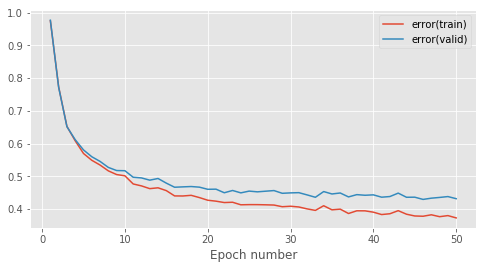

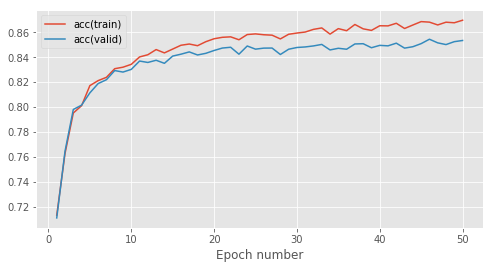

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
num_epochs = 50
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
kernel_dim = 5

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer((1,28,28,)) , #(1, 28, 28)
    PrintLayer(),
    ConvolutionalLayer(1, 5, 28, 28, 5, 5) , # (5, 24, 24)
    PrintLayer(),
    TanhLayer(), # (5, 24, 24)
    PrintLayer(),
    MaxPoolingLayer() ,  # (5, 12, 12)
    PrintLayer(),
    ConvolutionalLayer(5,10,12,12,5,5), # (10, 8, 8)
    PrintLayer(),
    TanhLayer(), # (10, 8, 8)
    PrintLayer(),
    ConvolutionalLayer(10,20,8,8,5,5), # (20, 4, 4)
    PrintLayer(),
    TanhLayer(), # (20, 4, 4)
    PrintLayer(),
    ReshapeLayer((20*4*4,)), #(320)
    PrintLayer(),
    BatchNormalizationLayer(320),
    PrintLayer(),
    ReshapeLayer((20, 4, 4,)), # (20, 4, 4)
    
    PrintLayer(),
    MaxPoolingLayer(), # (20, 2, 2)
    PrintLayer(),
    ReshapeLayer((20*2*2,)), #(80)
    PrintLayer(),
    BatchNormalizationLayer(80),
    PrintLayer(),
    AffineLayer(80, output_dim, weights_init, biases_init), # 47
    PrintLayer()
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=0.03)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)